In [1]:
import zipfile
import os

# Define paths
zip_path = "archive.zip"  # Replace with uploaded file name
extract_path = "cleaned_dataset"

# Extract ZIP file
with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction completed.")


Extraction completed.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



df = pd.read_csv("cleaned_dataset/cleaned_dataset/metadata.csv")  # Reload file

print("Dataset Shape:", df.shape)  # Check total rows and columns
print(df.head())  # Display first few rows




Dataset Shape: (7565, 10)
        type                                         start_time  \
0  discharge  [2010.       7.      21.      15.       0.    ...   
1  impedance  [2010.       7.      21.      16.      53.    ...   
2     charge  [2010.       7.      21.      17.      25.    ...   
3  impedance                    [2010    7   21   20   31    5]   
4  discharge  [2.0100e+03 7.0000e+00 2.1000e+01 2.1000e+01 2...   

   ambient_temperature battery_id  test_id  uid   filename  \
0                    4      B0047        0    1  00001.csv   
1                   24      B0047        1    2  00002.csv   
2                    4      B0047        2    3  00003.csv   
3                   24      B0047        3    4  00004.csv   
4                    4      B0047        4    5  00005.csv   

             Capacity                   Re                  Rct  
0  1.6743047446975208                  NaN                  NaN  
1                 NaN  0.05605783343888099  0.20097016584458333  


In [3]:

print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
type                      0
start_time                0
ambient_temperature       0
battery_id                0
test_id                   0
uid                       0
filename                  0
Capacity               4771
Re                     5609
Rct                    5609
dtype: int64


In [4]:

df["Capacity"] = pd.to_numeric(df["Capacity"], errors="coerce")
df["Re"] = pd.to_numeric(df["Re"], errors="coerce")
df["Rct"] = pd.to_numeric(df["Rct"], errors="coerce")


df["Capacity"].fillna(df["Capacity"].mean(), inplace=True)
df["Re"].fillna(df["Re"].median(), inplace=True)
df["Rct"].fillna(df["Rct"].median(), inplace=True)


print(df.dtypes)
print(df.head())


type                    object
start_time              object
ambient_temperature      int64
battery_id              object
test_id                  int64
uid                      int64
filename                object
Capacity               float64
Re                     float64
Rct                    float64
dtype: object
        type                                         start_time  \
0  discharge  [2010.       7.      21.      15.       0.    ...   
1  impedance  [2010.       7.      21.      16.      53.    ...   
2     charge  [2010.       7.      21.      17.      25.    ...   
3  impedance                    [2010    7   21   20   31    5]   
4  discharge  [2.0100e+03 7.0000e+00 2.1000e+01 2.1000e+01 2...   

   ambient_temperature battery_id  test_id  uid   filename  Capacity  \
0                    4      B0047        0    1  00001.csv  1.674305   
1                   24      B0047        1    2  00002.csv  1.326543   
2                    4      B0047        2    3  00003.cs

C:\Users\HP\AppData\Local\Temp\ipykernel_18860\2545159436.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Capacity"].fillna(df["Capacity"].mean(), inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_18860\2545159436.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

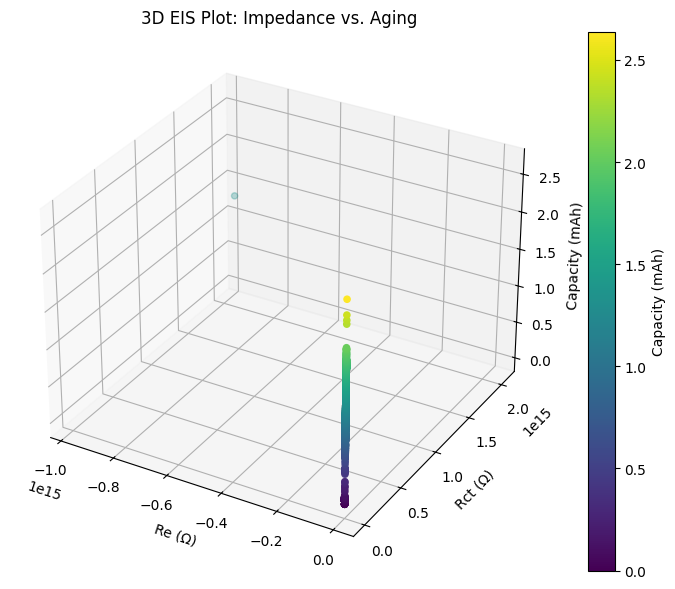

In [5]:
re_z = df["Re"]  # Real part of Impedance
im_z = df["Rct"]  # Assuming Rct is the Imaginary part of Impedance 
cycle_count = df["Capacity"]  # Assuming Capacity represents aging effect

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')


sc = ax.scatter(re_z, im_z, cycle_count, c=cycle_count, cmap="viridis", marker='o')

ax.set_xlabel("Re (Ω)")  # Adjust unit if needed
ax.set_ylabel("Rct (Ω)")  # Adjust unit if needed
ax.set_zlabel("Capacity (mAh)")  # Adjust based on dataset
ax.set_title("3D EIS Plot: Impedance vs. Aging")

cbar = plt.colorbar(sc)
cbar.set_label("Capacity (mAh)")


plt.show()

In [ ]:
import zipfile
import os

zip_path = "archive.zip"  
extract_path = "cleaned_dataset" 


with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall(extract_path)

# Verify extraction
print("Extracted contents:", os.listdir(extract_path))


In [ ]:
import os

# Define the expected paths
base_path = "cleaned_dataset"
data_path = os.path.join(base_path, "data")
extra_infos_path = os.path.join(base_path, "extra_infos")


print("Data folder exists:", os.path.exists(data_path))
print("Extra Infos folder exists:", os.path.exists(extra_infos_path))


print("Data folder contents:", os.listdir(data_path) if os.path.exists(data_path) else "Not Found")
print("Extra Infos folder contents:", os.listdir(extra_infos_path) if os.path.exists(extra_infos_path) else "Not Found")


In [ ]:
import os


nested_data_path = os.path.join("cleaned_dataset", "data", "cleaned_dataset")

# Check if this unexpected folder exists and list its contents
if os.path.exists(nested_data_path):
    print("Nested Data folder found! Listing contents:")
    print(os.listdir(nested_data_path))
else:
    print("No nested data folder found. Something is off.")


In [ ]:
import os

base_path = "cleaned_dataset"
data_path = os.path.join(base_path, "data")
extra_infos_path = os.path.join(base_path, "extra_infos")
metadata_file = os.path.join(base_path, "metadata.csv")


if os.path.exists(data_path):
    nested_contents = os.listdir(data_path)
    print("Data folder contents:", nested_contents)
    
    
    if "cleaned_dataset" in nested_contents:
        data_path = os.path.join(data_path, "cleaned_dataset")


print("Final Data Path:", data_path)
print("Data folder exists:", os.path.exists(data_path))
print("Extra Infos folder exists:", os.path.exists(extra_infos_path))
print("Metadata file exists:", os.path.exists(metadata_file))


if os.path.exists(data_path):
    print("Final Data folder contents:", os.listdir(data_path))
else:
    print("Final Data folder not found")


In [27]:
import os
import pandas as pd


final_data_path = os.path.join("cleaned_dataset", "data", "cleaned_dataset", "data")
extra_infos_path = os.path.join("cleaned_dataset", "data", "cleaned_dataset", "extra_infos")
metadata_file = os.path.join("cleaned_dataset", "data", "cleaned_dataset", "metadata.csv")

print("Final Data Path:", final_data_path)
print("Data folder exists:", os.path.exists(final_data_path))
print("Extra Infos folder exists:", os.path.exists(extra_infos_path))
print("Metadata file exists:", os.path.exists(metadata_file))


if os.path.exists(final_data_path):
    csv_files = [f for f in os.listdir(final_data_path) if f.endswith('.csv')]
    print("CSV Files Found:", csv_files)
else:
    print("Data folder not found!")

if csv_files:
    for file in csv_files[:1]:
        file_path = os.path.join(final_data_path, file)
        df = pd.read_csv(file_path)
        print(f"\nPreview of {file}:")
        print(df.head(3))


Final Data Path: cleaned_dataset\data\cleaned_dataset\data
Data folder exists: True
Extra Infos folder exists: True
Metadata file exists: True
CSV Files Found: ['00001.csv', '00002.csv', '00003.csv', '00004.csv', '00005.csv', '00006.csv', '00007.csv', '00008.csv', '00009.csv', '00010.csv', '00011.csv', '00012.csv', '00013.csv', '00014.csv', '00015.csv', '00016.csv', '00017.csv', '00018.csv', '00019.csv', '00020.csv', '00021.csv', '00022.csv', '00023.csv', '00024.csv', '00025.csv', '00026.csv', '00027.csv', '00028.csv', '00029.csv', '00030.csv', '00031.csv', '00032.csv', '00033.csv', '00034.csv', '00035.csv', '00036.csv', '00037.csv', '00038.csv', '00039.csv', '00040.csv', '00041.csv', '00042.csv', '00043.csv', '00044.csv', '00045.csv', '00046.csv', '00047.csv', '00048.csv', '00049.csv', '00050.csv', '00051.csv', '00052.csv', '00053.csv', '00054.csv', '00055.csv', '00056.csv', '00057.csv', '00058.csv', '00059.csv', '00060.csv', '00061.csv', '00062.csv', '00063.csv', '00064.csv', '00065.

In [23]:
import os
import pandas as pd


final_data_path = os.path.join("cleaned_dataset", "data", "cleaned_dataset", "data")


if not os.path.exists(final_data_path):
    print("Data folder not found!")
    csv_files = []
else:
    csv_files = [f for f in os.listdir(final_data_path) if f.endswith('.csv')]
    print(f"CSV Files Found: {len(csv_files)} - {csv_files[:2]}...")  # Show only first 2 file names


if csv_files:
    file_path = os.path.join(final_data_path, csv_files[0])
    df = pd.read_csv(file_path)

    print("\n Dataset Overview:")
    print(f"File: {csv_files[0]}")
    print(f" Shape: {df.shape}")
    print("Columns:", df.columns.tolist())
    
    print("\nSample Data:")
    print(df.head(3))


    missing_info = df.isnull().sum()
    print("\nMissing Values (if any):")
    print(missing_info[missing_info > 0])  # Show only columns with missing values


CSV Files Found: 7565 - ['00001.csv', '00002.csv']...

 Dataset Overview:
File: 00001.csv
 Shape: (490, 6)
Columns: ['Voltage_measured', 'Current_measured', 'Temperature_measured', 'Current_load', 'Voltage_load', 'Time']

Sample Data:
   Voltage_measured  Current_measured  Temperature_measured  Current_load  \
0          4.246711          0.000252              6.212696        0.0002   
1          4.246764         -0.001411              6.234019        0.0002   
2          4.039277         -0.995093              6.250255        1.0000   

   Voltage_load    Time  
0         0.000   0.000  
1         4.262   9.360  
2         3.465  23.281  

Missing Values (if any):
Series([], dtype: int64)


In [24]:

from scipy.integrate import cumulative_trapezoid  # Updated import
from mpl_toolkits.mplot3d import Axes3D


# Column mapping
voltage_col = "Voltage_measured"
current_col = "Current_measured"
time_col = "Time"

# Convert time to seconds (if needed)
df[time_col] = df[time_col].astype(float)

# Compute cumulative charge (Q) using numerical integration of I(t)
df["Capacity_Ah"] = cumulative_trapezoid(df[current_col], df[time_col], initial=0) / 3600  # Convert to Ah


df["dQ/dV"] = np.gradient(df["Capacity_Ah"], df[voltage_col])
df["Voltage_measured"] = df["Voltage_measured"].astype(float)

# Compute dQ/dV
df["dQ/dV"] = np.gradient(df["Capacity_Ah"], df["Voltage_measured"])

print(df[["Voltage_measured", "Capacity_Ah", "dQ/dV"]].head())


   

   Voltage_measured  Capacity_Ah     dQ/dV
0          4.246711     0.000000 -0.028489
1          4.246764    -0.000002 -0.028499
2          4.039277    -0.001928  0.168484
3          4.019506    -0.005559  0.220377
4          4.004763    -0.009212  0.280046


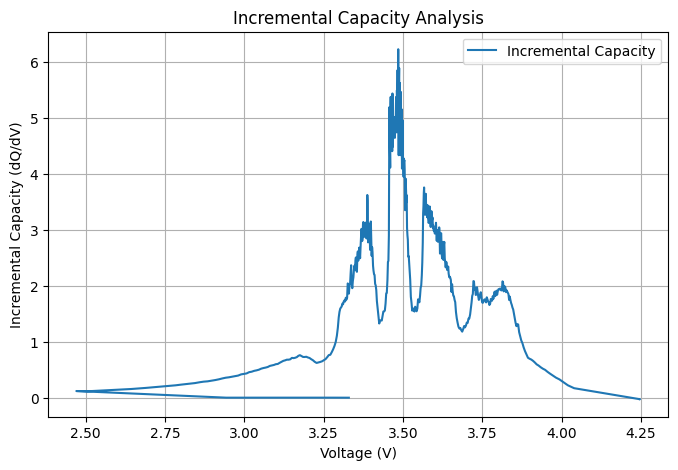

In [25]:
# Plot Incremental Capacity (dQ/dV vs V)
plt.figure(figsize=(8, 5))
plt.plot(df[voltage_col], df["dQ/dV"], label="Incremental Capacity")
plt.xlabel("Voltage (V)")
plt.ylabel("Incremental Capacity (dQ/dV)")
plt.title("Incremental Capacity Analysis")
plt.legend()
plt.grid()
plt.show()


   

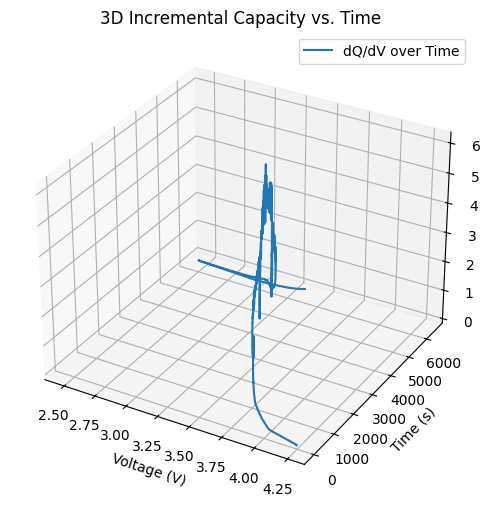

In [15]:
 # 3D Plot: dQ/dV vs. Voltage vs. Time
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection="3d")
ax.plot(df[voltage_col], df[time_col], df["dQ/dV"], label="dQ/dV over Time")

ax.set_xlabel("Voltage (V)")
ax.set_ylabel("Time (s)")
ax.set_zlabel("dQ/dV")
ax.set_title("3D Incremental Capacity vs. Time")
plt.legend()
plt.show()



Model Performance:
R² Score: 0.9719466322049011
MAE: 0.011369865132308962
RMSE: 0.0935676062295062


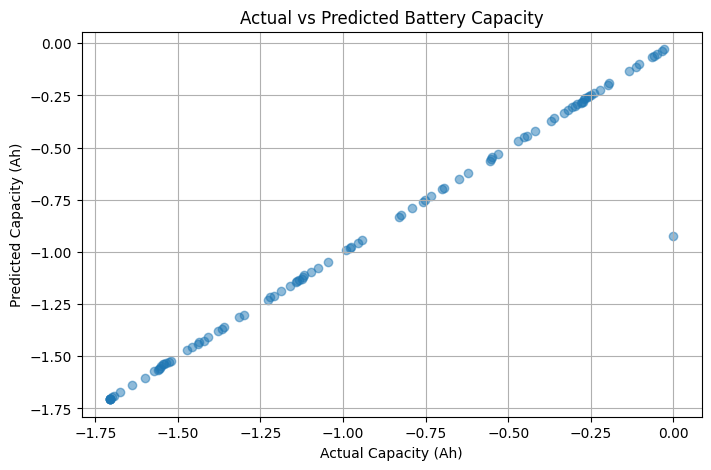

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define feature columns
feature_cols = ["Voltage_measured", "Current_measured", "Temperature_measured", "Current_load", "Voltage_load"]
target_col = "Capacity_Ah"  # The target variable


df = df.dropna()

# Splitting data
X = df[feature_cols]
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

# Evaluation Metrics
print("\nModel Performance:")
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# Plot predictions vs actual
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Capacity (Ah)")
plt.ylabel("Predicted Capacity (Ah)")
plt.title("Actual vs Predicted Battery Capacity")
plt.grid()
plt.show()
